In [1]:
# 例2-1 百万歌曲数据集中的收听次数二值化-二值目标变量
import pandas as pd

listen_count = pd.read_csv('data/train_triplets.txt.zip', header=None, delimiter='\t')

listen_count.head()

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [2]:
listen_count.shape

(48373586, 3)

In [4]:
# 表中包含有形式为“用户-歌曲-收听次数”的三元组（只包含非零收听次数）
# 因此，要二值化收听次数，只需将整个收听次数列设为1
listen_count[2] = 1
listen_count.head()

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [11]:
# 例2-2 Yelp数据集中的商家点评数量可视化
import json

biz_file = open('data/yelp_academic_dataset_business.json')  # 这个应该是用原始数据所创建的一个规模小得多的分类数据集吧
# 原始数据集：160万条点评和61184个商家

biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()
print(biz_df.shape)
biz_df.head()

(11537, 13)


,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"[Accountants, Professional Services, Tax Servi...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"[Sporting Goods, Bikes, Shopping]",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"[Food, Grocery]",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business


Figure(432x288) AxesSubplot(0.125,0.125;0.775x0.755)
--------------------------------------------------


Text(0, 0.5, 'Occurrence')

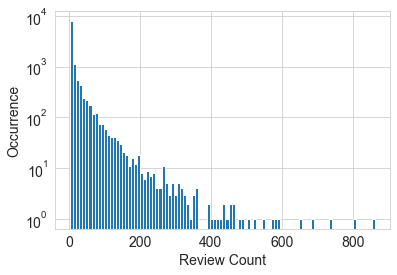

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制点评数量直方图
sns.set_style('whitegrid')
fig, ax = plt.subplots()
print(fig, ax)
# print(type(plt.subplots()))  # 不能这样子打出来
print('-' * 50)
biz_df['review_count'].hist(ax=ax, bins=100)

ax.set_yscale('log')  # y轴使用对数标度
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [12]:
# 例2-3 通过固定宽度分箱对计数值进行区间量化
import numpy as np

# 生成20个随机整数 0-99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([ 6,  1, 47,  0, 97, 38, 93, 90, 43, 44,  6, 81, 87, 29, 34,  9,  9,
       39, 56,  2])

In [13]:
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是0-9  向下取整
np.floor_divide(small_counts, 10)
# 结果表示在第几个分箱中

array([0, 0, 4, 0, 9, 3, 9, 9, 4, 4, 0, 8, 8, 2, 3, 0, 0, 3, 5, 0],
      dtype=int32)

In [14]:
# 横跨若干数量级的计数值数组
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

# 通过对数函数映射到指数宽度分箱
np.floor(np.log10(large_counts))  # 大道至简

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

# 分位数分箱

In [15]:
# 根据数据的分布特点，进行自适应的箱体定位
# 这种方法可以使用数据分布的 分位数quantile 来实现
# 分位数：可以将数据划分为相等的若干份数的值

# 例2-4 计算Yelp（美国最大点评网站）商家点评数量的十分位数(deciles)
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
# 四分位数 [0.25, 0.5, 0.75]

deciles
# 解释一下：至少20%的点评数量≤3.0，至多10%的点评数量>50.0，看懂y轴使用对数标度的图

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    12.0
0.8    23.0
0.9    50.0
Name: review_count, dtype: float64

9


Text(0, 0.5, 'Occurrence')

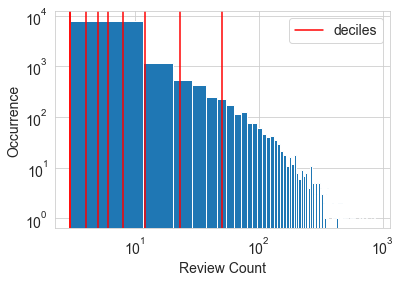

In [22]:
# 在直方图上画出十分位数
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)

i = 0
for pos in deciles:
    handle = plt.axvline(pos, color='r')  # 前两条vline重叠了
    i += 1

print(i)

ax.legend([handle], ['deciles'], fontsize=14)  # handle为什么会有警告呢？
ax.set_yscale('log')
ax.set_xscale('log')  # x轴和y轴都是对数标度
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [26]:
# 计算分位数并将数据映射到分位数分箱中
# 例2-5 通过分位数对计数值进行分箱
# 将计数值映射为分位数
pd.qcut(large_counts, 4, labels=False)  # qcut: 依照数量分组

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [25]:
# 计算实际的分位数值
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])


0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64